In [1]:
!ls

anaconda3		     CAX_Superhero_Test.zip   Nvidia_Cloud_EULA.pdf
cax_notebook.ipynb	     CAX_Superhero_Train      src
cax_notebook-resnet50.ipynb  CAX_Superhero_Train.zip  tutorials
CAX_Superhero_Test	     __MACOSX


In [2]:
!ls

anaconda3		     CAX_Superhero_Test.zip   Nvidia_Cloud_EULA.pdf
cax_notebook.ipynb	     CAX_Superhero_Train      src
cax_notebook-resnet50.ipynb  CAX_Superhero_Train.zip  tutorials
CAX_Superhero_Test	     __MACOSX


In [3]:
import os

In [4]:
from scipy.misc import imread,imresize,imshow

In [5]:

import numpy as np

In [6]:
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [7]:
!rm CAX_Superhero_Train/Hulk/8145cax.jpg

rm: cannot remove 'CAX_Superhero_Train/Hulk/8145cax.jpg': No such file or directory


In [8]:
!rm CAX_Superhero_Train/Superman/cax_superman_train4738.jpg

rm: cannot remove 'CAX_Superhero_Train/Superman/cax_superman_train4738.jpg': No such file or directory


In [15]:
!rm CAX_Superhero_Train/Hulk/8613cax.jpg

rm: cannot remove 'CAX_Superhero_Train/Hulk/8613cax.jpg': No such file or directory


In [44]:
!rm "CAX_Superhero_Train/Black Panther/4736cax.jpg"

In [14]:
!rm CAX_Superhero_Train/Aquaman/1491cax.jpg

In [7]:
!ls

anaconda3	    CAX_Superhero_Test.zip   __MACOSX		    tutorials
cax_notebook.ipynb  CAX_Superhero_Train      Nvidia_Cloud_EULA.pdf
CAX_Superhero_Test  CAX_Superhero_Train.zip  src


In [9]:
######################### preparing the train data -- x_train #####################################


import numpy as np
count =0
dir_count =-1
temp = []
y_train = []
rootDir = 'CAX_Superhero_Train/'
for dirName, subdirList, fileList in os.walk(rootDir):
    
    dir_count+=1
    print dir_count, dirName
  
    for fname in fileList:
          if "cax" in fname:
             ##print('\t%s' % fname)
                y_train.append(dir_count - 1)
                count +=1
                temp.append(str(dirName+"/"+fname))



# img_set = set(im.shape for im in temp)
# if(len(img_set)!=1):
#        print "not all images of same dims",len(img_set),img_set
# else:
#        print "all images of same dims", img_set
    

          
x_train = np.array(temp)
y_train = np.array(y_train)

del temp

import gc
gc.collect()


0 CAX_Superhero_Train/
1 CAX_Superhero_Train/Ant-Man
2 CAX_Superhero_Train/Hulk
3 CAX_Superhero_Train/Aquaman
4 CAX_Superhero_Train/Avengers
5 CAX_Superhero_Train/Spiderman
6 CAX_Superhero_Train/Superman
7 CAX_Superhero_Train/Batman
8 CAX_Superhero_Train/Ghost Rider
9 CAX_Superhero_Train/Black Panther
10 CAX_Superhero_Train/Catwoman
11 CAX_Superhero_Train/Captain America
12 CAX_Superhero_Train/Iron Man


51

In [0]:
######################### preparing the test data -- x_test for evaluation purpose #####################################

count =0
dir_count =-1
temp1 = []
from collections import defaultdict
dict1 = defaultdict(list)
rootDir = 'CAX_Superhero_Test'
for dirName, subdirList, fileList in os.walk(rootDir):
   
    for fname in fileList:
            if "superhero" in fname:      
                    count +=1

                    img = imread(rootDir+"/"+fname)

                    img = imresize(img,(180,180))


                    ##print count, dirName+"/"+fname
                    ##dict1[img.shape].append(dirName+"/"+fname)

                    temp1.append(img.astype('float32'))


print len(temp1)
img_set = set(im.shape for im in temp1)
if(len(img_set)!=1):
       print "not all images of same dims",len(img_set),img_set
else:
       print "all images of same dims", img_set
    

          
x_test = np.array(temp1)


In [18]:
import tensorflow


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
import keras

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [12]:
seed = 7
np.random.seed(seed)

In [13]:
!pip install sklearn


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Input, Add
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_train, y_train, test_size = 0.2)
train_ids = zip(x_train, y_train)
valid_ids = zip(x_test, y_test)

In [16]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(10808,) (10808,) (2702,) (2702,)


In [17]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
base_model = ResNet50(weights='imagenet', include_top=False,input_shape = (224,224,3))

base_model.summary()

94666752/94653016 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
____________________________________________

In [18]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(12, activation='softmax'))

In [19]:
model_final = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [20]:
lrate = 0.0001
adam = Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_final.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [51]:
for i, n in enumerate(model_final.layers):
  print i ,n
  

0 <keras.engine.topology.InputLayer object at 0x7f1cb0c4fe50>
1 <keras.layers.convolutional.Conv2D object at 0x7f1d17f63d90>
2 <keras.layers.convolutional.Conv2D object at 0x7f1d1be634d0>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f1d1b55fbd0>
4 <keras.layers.convolutional.Conv2D object at 0x7f1cb0c9fe90>
5 <keras.layers.convolutional.Conv2D object at 0x7f1cb0cf1510>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f1cb0cd3650>
7 <keras.layers.convolutional.Conv2D object at 0x7f1cb0d30ed0>
8 <keras.layers.convolutional.Conv2D object at 0x7f1cb0d73610>
9 <keras.layers.convolutional.Conv2D object at 0x7f1cb0d64190>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f1cb0961c50>
11 <keras.layers.convolutional.Conv2D object at 0x7f1cb0907110>
12 <keras.layers.convolutional.Conv2D object at 0x7f1cb091abd0>
13 <keras.layers.convolutional.Conv2D object at 0x7f1cb092df90>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f1cb08c2710>
15 <keras.layers.convolutional.Conv2D object at 0x7

In [52]:
print model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
#fit_generator
batch_size = 16
params = {'dim_x': 224,
          'dim_y': 224,
          'dim_z': 3,
          'batch_size': batch_size,
          'shuffle': True}

training_generator = DataGenerator(**params).generate(train_ids)
validation_generator = DataGenerator(**params).generate(valid_ids)


train_steps = len(train_ids)/batch_size
valid_steps = len(valid_ids)/batch_size



In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping



History = model_final.fit_generator(generator = training_generator,
                    steps_per_epoch = train_steps,
                    validation_data = validation_generator,
                    validation_steps = valid_steps,
                    epochs=20
                   )


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:47: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:50: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Epoch 1/20
675/675 [==============================] - 82s 121ms/step - loss: 0.9474 - acc: 0.7097 - val_loss: 0.8378 - val_acc: 0.7571
Epoch 2/20
675/675 [==============================] - 71s 105ms/step - loss: 0.3868 - acc: 0.8813 - val_loss: 0.5465 - val_acc: 0.8322
Epoch 3/20
675/675 [==============================] - 71s 105ms/step - loss: 0.2393 - acc: 0.9282 - val_loss: 0.8102 - val_acc: 0.7798
Epoch 4/20
675/675 [==============================] - 71s 105ms/step - loss: 0.1573 - acc: 0.9527 - val_loss: 0.8961 - val_acc: 0.8021
Epoch 5/20
675/675 [==============================] - 71s 105ms/step - loss: 0.1288 - acc: 0.9596 - val_loss: 0.7808 - val_acc: 0.7920
Epoch 6/20
675/675 [==============================] - 71s 105ms/step - loss: 0.1182 - acc: 0.9638 - val_loss: 0.7002 - val_acc: 0.8300
Epoch 7/20
675/675 [==============================] - 71s 105ms/step - loss: 0.0892 - acc: 0.9718 - val_loss: 0.8974 - val_acc: 0.7764
Epoch 8/20
675/675 [==============================] - 7

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from numpy.testing import assert_allclose

filepath = "drive/superheroes/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [early_stopper]

# Fit the model
History = model_final.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test),  batch_size=16, callbacks=callbacks_list)

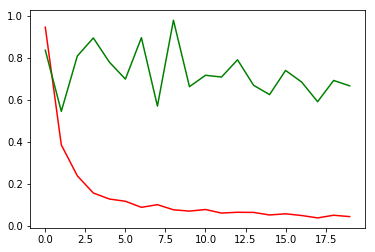

In [24]:
plt.plot(History.history['loss'], 'r')
plt.plot(History.history['val_loss'], 'g')

In [0]:
y_prob = model_final.predict_generator(validation_generator, steps=valid_steps+1)
target_class = np.argmax(y_prob, axis=1)

In [0]:
y_prob.shape

(2702,)

In [0]:
labels = ['Irnman',
'Suprmn',
'Aqamn',
'Hulk',
'AntMn',
'Catwmn',
'Avngs',
'Btmn',
'BlckPner',
'CapAme',
'Spdrmn',
'GhstRdr']

In [0]:
cm = confusion_matrix(y_test, target_class)
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

plt.show()

ValueError: ignored

In [21]:
class DataGenerator(object):
  'Generates data for Keras'
  def __init__(self, dim_x = 224, dim_y = 224, dim_z = 3, batch_size = 16, shuffle = True):
      'Initialization'
      self.dim_x = dim_x
      self.dim_y = dim_y
      self.dim_z = dim_z
      self.batch_size = batch_size
      self.shuffle = shuffle

  def generate(self, list_IDs):
      'Generates batches of samples'
      # Infinite loop
      while 1:
          # Generate order of exploration of dataset
          indexes = self.__get_exploration_order(list_IDs)

          # Generate batches
          imax = int(len(indexes)/self.batch_size)
          for i in range(imax):
              # Find list of IDs
              list_IDs_temp = [list_IDs[k] for k in indexes[i*self.batch_size:(i+1)*self.batch_size]]

              # Generate data
              X, y = self.__data_generation(list_IDs_temp)

              yield X, y

  def __get_exploration_order(self, list_IDs):
      'Generates order of exploration'
      # Find exploration order
      indexes = np.arange(len(list_IDs))
      if self.shuffle == True:
          np.random.shuffle(indexes)

      return indexes

  def __data_generation(self, list_IDs_temp):
      'Generates data of batch_size samples' # X : (n_samples, v_size, v_size, v_size, n_channels)
      # Initialization
      X = np.empty((self.batch_size, self.dim_x, self.dim_y, self.dim_z), dtype = np.float32)
      y = np.empty((self.batch_size), dtype = int)

      # Generate data
      for i, ID in enumerate(list_IDs_temp):
          # Store volume
          img = imread(ID[0])

          try:
            img = imresize(img,(224,224))
            img = img.astype(np.float32)
            img /= 255.
          except:
            print 'mode error: %s' %ID[0]
          
          
          
          assert ((img.shape[0] == self.dim_x) and (img.shape[1] == self.dim_y) and (img.shape[2] == self.dim_z)), "%d %d %d %s" %(img.shape[0], img.shape[1], img.shape[2], ID[0])
                               
          X[i, :, :, :] = img

          # Store class
          y[i] = ID[1]

      return X, sparsify(y)

def sparsify(y):
  'Returns labels in binary NumPy array'
  n_classes = 12 # Enter number of classes
  return np.array([[1 if y[i] == j else 0 for j in range(n_classes)]
                   for i in range(y.shape[0])])

In [0]:
# load the model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from numpy.testing import assert_allclose


new_model = load_model("model.h5")
assert_allclose(model.predict(X_train),
                new_model.predict(X_train),
                1e-5)

# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
new_model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=5, batch_size=50, callbacks=callbacks_list)

Using TensorFlow backend.


IOError: ignored

>